In [88]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2
import os
import requests

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True) 
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = ['__background__', 'person', 'bicycle', 
                                'car', 'motorcycle', 'airplane', 'bus', 
                                'train', 'truck', 'boat', 'traffic light', 
                                'fire hydrant', 'N/A', 'stop sign', 'parking meter', 
                                'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 
                                'cow', 'elephant', 'bear', 'zebra', 'giraffe', 
                                'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 
                                'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
                                'snowboard', 'sports ball', 'kite', 'baseball bat', 
                                'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 
                                'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
                                'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 
                                'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
                                'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 
                                'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 
                                'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 
                                'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [89]:
   
img_url = ['http://farm5.staticflickr.com/4079/4736162354_e0ddcc72dc_z.jpg',
           "http://farm4.staticflickr.com/3577/3491669985_d81e1050c6_z.jpg",
           "http://farm8.staticflickr.com/7201/6962274914_55f2a4d39c_z.jpg",
           "http://farm9.staticflickr.com/8331/8395076888_929af4a595_z.jpg",
           "http://farm1.staticflickr.com/23/25514401_b0ee95537c_z.jpg",
           "http://farm5.staticflickr.com/4115/4808627642_46feddf8c3_z.jpg",
           "http://farm3.staticflickr.com/2527/3894984169_a1b0127524_z.jpg"
          ]

In [90]:
def get_prediction_url(model, url, threshold):
    img = Image.open(requests.get(url, stream=True).raw)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(int(i[0]), int(i[1])), (int(i[2]), int(i[3]))] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class

In [91]:
def object_detection_api_url(model, url, threshold=0.5, rect_th=5, text_size=2, text_th=5): 
    boxes, pred_cls = get_prediction_url(model,url, threshold) 
    img =np.array(Image.open(requests.get(url, stream=True).raw))
    rect_th = int(0.002*img.shape[0])
    text_size = int(0.004*img.shape[0])
    text_th = int(0.005*img.shape[0])
    
    plt.figure()
    for i in range(len(boxes)): 
        cv2.rectangle(img,boxes[i][0],boxes[i][1],color=(0, 255, 0), thickness=rect_th) 
        cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) 
    plt.imshow(img) 

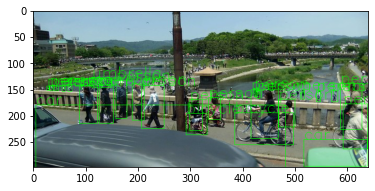

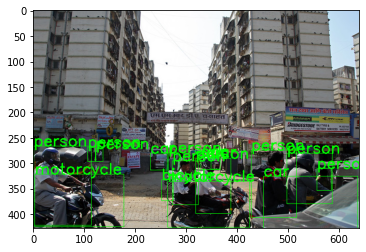

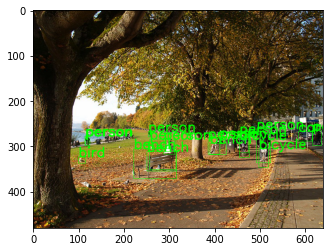

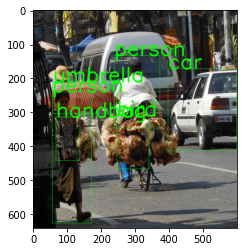

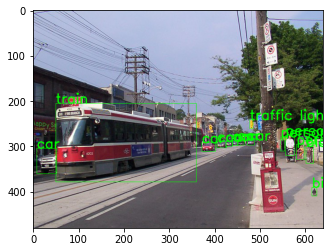

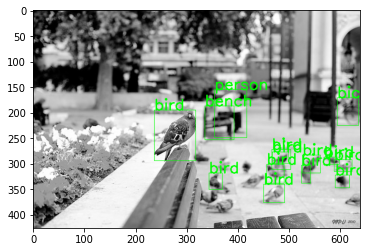

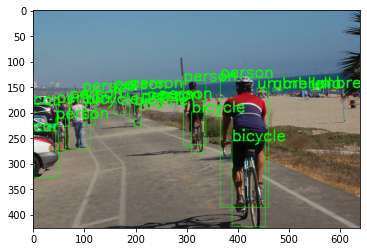

In [95]:
for url in img_url:
    object_detection_api_url(model,url, threshold=0.75)


In [ ]:
# def get_prediction(model, img_path, threshold):
#     img = Image.open(img_path)
#     transform = T.Compose([T.ToTensor()])
#     img = transform(img)
#     pred = model([img])
#     pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
#     pred_boxes = [[(int(i[0]), int(i[1])), (int(i[2]), int(i[3]))] for i in list(pred[0]['boxes'].detach().numpy())]
#     pred_score = list(pred[0]['scores'].detach().numpy())
#     pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
#     pred_boxes = pred_boxes[:pred_t+1]
#     pred_class = pred_class[:pred_t+1]
#     return pred_boxes, pred_class

# def object_detection_api(model, img_path, threshold=0.5, rect_th=5, text_size=2, text_th=5): 
#     boxes, pred_cls = get_prediction(model,img_path, threshold) 
#     img =np.array(Image.open(img_path))
#     rect_th = int(0.002*img.shape[0])
#     text_size = int(0.004*img.shape[0])
#     text_th = int(0.005*img.shape[0])
    
#     # img = cv2.imread(img_path) 
#     # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     plt.figure()#figsize=()) 
#     for i in range(len(boxes)): 
#         cv2.rectangle(img,boxes[i][0],boxes[i][1],color=(0, 255, 0), thickness=rect_th) 
#         cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) 
#     plt.imshow(img) 
        
# ### Function to produce noisy and scaled image 

# import os, fnmatch
# images = fnmatch.filter(os.listdir('./images'), '*.jpeg')
# for img in images:
#     object_detection_api(model,str(os.path.join('./images',img)), threshold=0.8)